In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot

Using TensorFlow backend.


In [2]:
from keras.layers import Convolution2D, Flatten,MaxPool2D,Dense
from keras.models import Sequential

In [3]:
cnn = Sequential()
        
cnn.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Flatten())
       
cnn.add(Dense(output_dim=128,activation='relu'))
cnn.add(Dense(output_dim=1,activation='sigmoid'))
        
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])    

C:\Users\danis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\danis\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  import sys
C:\Users\danis\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
training_set=train_datagen.flow_from_directory('dataset/training_set',target_size=(64,64),batch_size=32,class_mode="binary")

Found 8000 images belonging to 2 classes.


In [7]:
test_set = test_datagen.flow_from_directory("dataset/test_set",target_size=(64,64),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [8]:
cnn.fit_generator(training_set,steps_per_epoch=8000,epochs=25,validation_data = test_set,validation_steps=2000)

Epoch 1/25
8000/8000 [==============================] - 1362s 170ms/step - loss: 0.3914 - accuracy: 0.8158 - val_loss: 0.4853 - val_accuracy: 0.7810
Epoch 2/25
8000/8000 [==============================] - 1416s 177ms/step - loss: 0.1373 - accuracy: 0.9472 - val_loss: 0.4862 - val_accuracy: 0.7671
Epoch 3/25
8000/8000 [==============================] - 1409s 176ms/step - loss: 0.0706 - accuracy: 0.9747 - val_loss: 1.7453 - val_accuracy: 0.7661
Epoch 4/25
8000/8000 [==============================] - 1418s 177ms/step - loss: 0.0495 - accuracy: 0.9829 - val_loss: 0.8197 - val_accuracy: 0.7731
Epoch 5/25
8000/8000 [==============================] - 1316s 164ms/step - loss: 0.0399 - accuracy: 0.9868 - val_loss: 1.4057 - val_accuracy: 0.7656
Epoch 6/25
8000/8000 [==============================] - 1306s 163ms/step - loss: 0.0333 - accuracy: 0.9891 - val_loss: 1.0658 - val_accuracy: 0.7641
Epoch 7/25
8000/8000 [==============================] - 1303s 163ms/step - loss: 0.0278 - accuracy: 0.9910

In [18]:
import cv2
import matplotlib.pyplot as plt

In [15]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

         It's a Dog!          


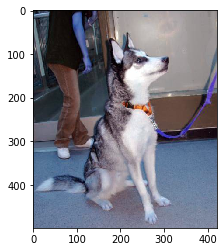

In [28]:
img = cv2.imread("dataset/test_set/dogs/dog.4001.jpg")
plt.imshow(img)
img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)


if cnn.predict(img) == [[1.]]:
    string ="It's a Dog!"
    print(string.center(30))
    
else:
   print("It's a Cat!".center(30))

# We Used predict() because predicting data was small (1-2 in this case), otherwise use predict_generator().

         It's a Dog!          


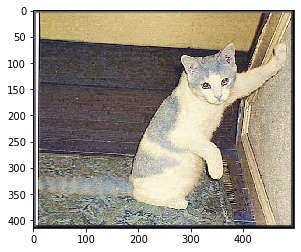

In [31]:
img = cv2.imread("dataset/test_set/cats/cat.4001.jpg")
plt.imshow(img)
img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)


if cnn.predict(img) == [[1.]]:
    string ="It's a Dog!"
    print(string.center(30))
    
else:
   print("It's a Cat!".center(30))

         It's a Cat!          


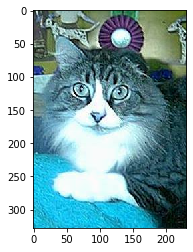

In [32]:
img = cv2.imread("dataset/test_set/cats/cat.4345.jpg")
plt.imshow(img)
img = cv2.resize(img,(64,64))
img = img.reshape(1,64,64,3)


if cnn.predict(img) == [[1.]]:
    string ="It's a Dog!"
    print(string.center(30))
    
else:
   print("It's a Cat!".center(30))